<a href="https://colab.research.google.com/github/kanoksaknon/Preditive-PM2.5-KNN/blob/main/k_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# 1. โหลดข้อมูลจาก CSV file
file_path = '408-1.csv'
df = pd.read_csv(file_path)
df.head()

,date_time,pm25,hcho,tvoc,temperature,humidity
0,21/8/2021 22:00,14.882353,10.0,256.076923,33.002703,62.413514
1,21/8/2021 23:00,13.272727,10.0,226.272727,34.745455,58.372727
2,22/8/2021 0:00,14.750000,10.0,225.333333,34.958333,57.833333
3,22/8/2021 1:00,15.583333,10.0,226.000000,34.883333,58.191667
4,22/8/2021 2:00,16.416667,10.0,225.583333,34.700000,57.566667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7492 entries, 0 to 7491
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_time    7492 non-null   object 
 1   pm25         7492 non-null   float64
 2   hcho         7492 non-null   float64
 3   tvoc         7492 non-null   float64
 4   temperature  7492 non-null   float64
 5   humidity     7492 non-null   float64
dtypes: float64(5), object(1)
memory usage: 351.3+ KB


In [ ]:
# 2. แปลง date_time เป็น datetime object และตั้งเป็น index
df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y %H:%M')
df.set_index('date_time', inplace=True)

In [ ]:
# 3. เลือกเฉพาะ features ที่เราสนใจ
selected_features = ['pm25', 'hcho', 'tvoc', 'temperature', 'humidity']
df = df[selected_features]

In [ ]:
df.dropna(inplace=True) #missing value เผื่อๆ
print(df.isnull().sum()) # Check for missing values

pm25           0
hcho           0
tvoc           0
temperature    0
humidity       0
dtype: int64


In [ ]:
# 5. แบ่งข้อมูลเป็น train set และ test set
X = df.drop('pm25', axis=1)  # เลือก features ที่ใช้ในการทำนาย
y = df['pm25']  # target variable (pm2.5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6. Standardization ของข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 7. สร้างโมเดล K-NN
knn = KNeighborsRegressor(n_neighbors=5)  # กำหนดจำนวนเพื่อบรรจุในการทำนาย
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [ ]:
# 8. ทำนายค่า pm2.5 สำหรับ test set
y_pred = knn.predict(X_test_scaled)

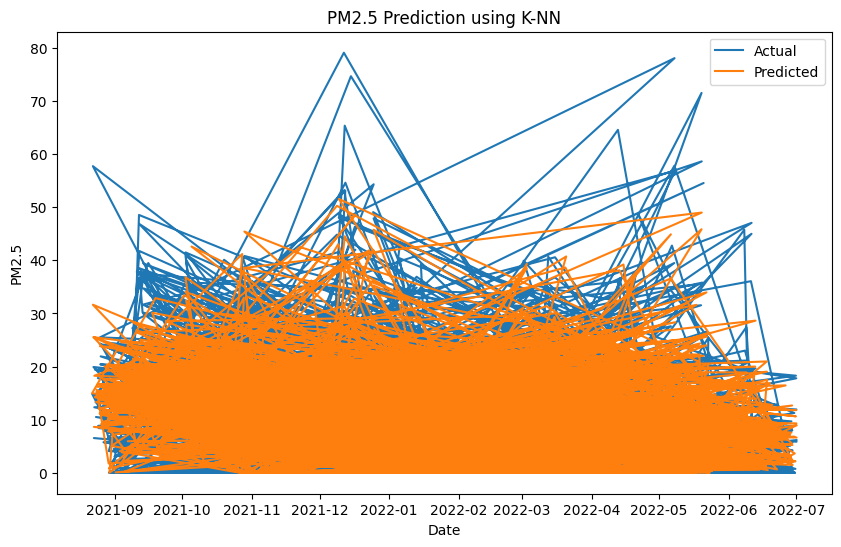

In [ ]:
# 10. พล็อตกราฟการทำนาย
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('PM2.5 Prediction using K-NN')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

In [ ]:
#วัดประสิทธิภาพ RRSE กะ R-square
import numpy as np
from sklearn.metrics import r2_score

# 1. คำนวณ Root Relative Squared Error (RRSE)
def calculate_rrse(y_true, y_pred):
    rss = np.sum((y_true - y_pred)**2)  # Residual Sum of Squares
    tss = np.sum((y_true - np.mean(y_true))**2)  # Total Sum of Squares
    rrse = np.sqrt(rss / tss)
    return rrse

# 2. คำนวณค่า R-squared (square correlation)
def calculate_r_squared(y_true, y_pred):
    r_squared = r2_score(y_true, y_pred)
    return r_squared

# 3. ทดสอบคำนวณ RRSE และค่า R-squared ด้วยข้อมูลทดสอบ (y_test, y_pred)
rrse_value = calculate_rrse(y_test.values, y_pred)
r_squared_value = calculate_r_squared(y_test.values, y_pred)

print(f'Root Relative Squared Error (RRSE): {rrse_value:.4f}')
print(f'R-squared (Square Correlation): {r_squared_value:.4f}')

Root Relative Squared Error (RRSE): 0.7514
R-squared (Square Correlation): 0.4354


In [ ]:
# Calculate correlation coefficients between each feature and PM2.5
correlation_pm25 = df.corr()['pm25']

# Print correlation coefficients
print(correlation_pm25)

pm25           1.000000
hcho           0.105220
tvoc           0.209133
temperature    0.280416
humidity       0.319117
Name: pm25, dtype: float64


In [ ]:
#วัดประสิทธิภาพ RRSE กะ R-square
import numpy as np
from sklearn.metrics import r2_score

# 1. คำนวณ Root Relative Squared Error (RRSE)
def calculate_rrse(y_true, y_pred):
    rss = np.sum((y_true - y_pred)**2)  # Residual Sum of Squares
    tss = np.sum((y_true - np.mean(y_true))**2)  # Total Sum of Squares
    rrse = np.sqrt(rss / tss)
    return rrse

# 2. คำนวณค่า R-squared (square correlation)
def calculate_r_squared(y_true, y_pred):
    r_squared = r2_score(y_true, y_pred)
    return r_squared

# 3. ทดสอบคำนวณ RRSE และค่า R-squared ด้วยข้อมูลทดสอบ (y_test, y_pred)
rrse_value = calculate_rrse(y_test.values, y_pred)
r_squared_value = calculate_r_squared(y_test.values, y_pred)

print(f'Root Relative Squared Error (RRSE): {rrse_value:.4f}')
print(f'R-squared (Square Correlation): {r_squared_value:.4f}')

Root Relative Squared Error (RRSE): 0.7514
R-squared (Square Correlation): 0.4354


เอาไว้ใช้ในงานหน้าๆ เอา Value มาแสดง

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# 1. โหลดข้อมูลจาก CSV file
file_path = '408-1.csv'
df = pd.read_csv(file_path)

# 2. แปลง date_time เป็น datetime object และตั้งเป็น index
df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y %H:%M')
df.set_index('date_time', inplace=True)

# 3. เลือกเฉพาะ features ที่สนใจ (pm2.5, hcho, tvoc, temperature, humidity)
selected_features = ['pm25', 'hcho', 'tvoc', 'temperature', 'humidity']
df = df[selected_features]

# 4. กำจัดแถวที่มี missing values
df.dropna(inplace=True)

# 5. แบ่งข้อมูลเป็น train set และ test set
X = df.drop('pm25', axis=1)  # เลือก features ที่ใช้ในการทำนาย
y = df['pm25']  # target variable (pm2.5)

# 6. Standardization ของข้อมูล
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. สร้างและฝึกโมเดล K-NN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_scaled, y)

# 8. ทำนายค่า pm2.5 ในอนาคต (ให้กำหนดค่าที่ต้องการทำนายในอนาคต)
future_hcho_value = 0.5  # ค่า hcho ในอนาคตที่ต้องการทำนาย
future_tvoc_value = 200.0  # ค่า tvoc ในอนาคตที่ต้องการทำนาย
future_temperature = 30.0  # ค่า temperature ในอนาคตที่ต้องการทำนาย
future_humidity = 50.0  # ค่า humidity ในอนาคตที่ต้องการทำนาย

future_data = np.array([[future_hcho_value, future_tvoc_value, future_temperature, future_humidity]])
future_data_scaled = scaler.transform(future_data)

predicted_pm25 = knn.predict(future_data_scaled)

print(f'ค่าทำนาย pm2.5 ในอนาคต: {predicted_pm25[0]:.4f}')


ค่าทำนาย pm2.5 ในอนาคต: 21.8769


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


................................................................................

495 Sucess

In [ ]:
from google.colab import files

# Upload data.csv file
uploaded = files.upload()

Saving Hisdata1-1.csv to Hisdata1-1.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# 1. อ่านข้อมูลจาก CSV file
file_path = 'Hisdata1-1.csv'
df = pd.read_csv(file_path)
df.head()

,date_time,Temperature,Humidity,PM2.5,PM10,CO2
0,19/4/2024 17:17,24.9,0.71,95.0,103.0,5000.0
1,19/4/2024 17:17,26,0.65,79.0,83.0,2766.0
2,19/4/2024 17:16,NaN,NaN,NaN,NaN,NaN
3,19/4/2024 17:16,24.9,0.70,91.0,100.0,5000.0
4,19/4/2024 17:16,26,0.64,79.0,84.0,2766.0


In [ ]:
print(df.isnull().sum()) # Check for missing values

date_time        0
Temperature    942
Humidity       942
PM2.5          942
PM10           942
CO2            942
dtype: int64


In [ ]:
df.dropna(inplace=True) #missing value เผื่อๆ
print(df.isnull().sum()) # Check for missing values

date_time      0
Temperature    0
Humidity       0
PM2.5          0
PM10           0
CO2            0
dtype: int64


In [ ]:
df.head()

,date_time,Temperature,Humidity,PM2.5,PM10,CO2
0,19/4/2024 17:17,24.9,0.71,95.0,103.0,5000.0
1,19/4/2024 17:17,26,0.65,79.0,83.0,2766.0
3,19/4/2024 17:16,24.9,0.70,91.0,100.0,5000.0
4,19/4/2024 17:16,26,0.64,79.0,84.0,2766.0
5,19/4/2024 17:15,24.9,0.70,94.0,101.0,5000.0


In [ ]:
# แปลงคอลัมน์ date_time เป็น datetime object
df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y %H:%M')

# ตั้งค่า date_time เป็น index ของ DataFrame
df.set_index('date_time', inplace=True)

In [ ]:
# กรองข้อมูลโดยลบแถวที่มีค่า 'aquisition fail' ในคอลัมน์ 'PM2.5'
df = df[df['PM2.5'] != 'aquisition fail']

# แปลงค่าในคอลัมน์ 'PM2.5' เป็นชนิดตัวเลข
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')

In [ ]:
# เลือก features ที่ต้องการใช้ในการทำนาย (pm2.5, hcho, tvoc, temperature, humidity)
features = ['Temperature', 'Humidity', 'PM10', 'CO2']

# แยก features และ target variable (pm2.5)
X = df[features]
y = df['PM2.5']

In [ ]:
# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ตรวจสอบและลบแถวที่มีค่า 'aquisition fail' ใน X_train และ y_train
train_indices = X_train.index[X_train.isin(['aquisition fail']).any(axis=1)]
X_train = X_train[~X_train.index.isin(train_indices)]
y_train = y_train[~y_train.index.isin(train_indices)]

In [ ]:
# สร้างและฝึกโมเดล KNN Regression
n_neighbors = 5  # จำนวนของเพื่อนบ้านที่ใช้ในการทำนาย
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights='uniform', metric='euclidean')
knn_model.fit(X_train, y_train)

# ทดสอบโมเดลบนชุดข้อมูลทดสอบ
y_pred = knn_model.predict(X_test)

In [ ]:
# คำนวณค่า Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
# พล็อตกราฟผลลัพธ์การทำนาย
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('PM2.5 Prediction with KNN Regression')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

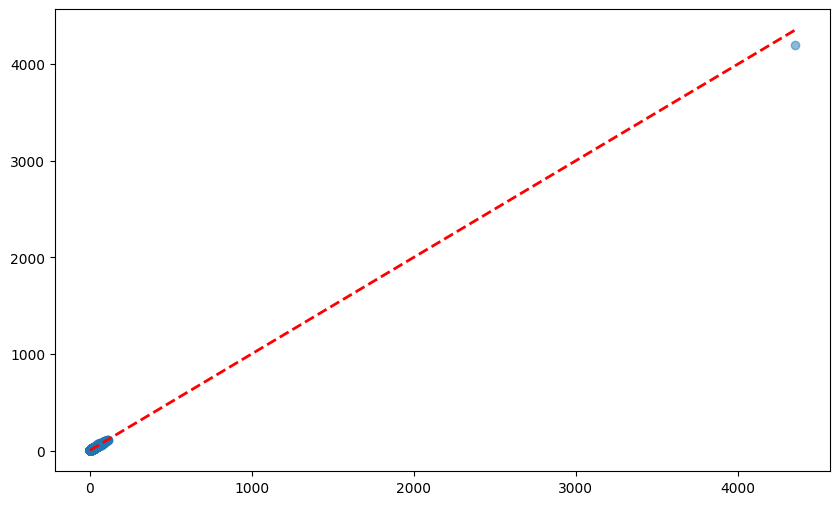

In [ ]:
# พล็อต scatter plot ผลลัพธ์การทำนาย
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # เส้นแทรกเพื่อแสดงค่าที่เท่ากัน

In [ ]:
from sklearn.metrics import r2_score

# คำนวณค่า Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# คำนวณ Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# คำนวณ Root Relative Squared Error (RRSE)
mean_y_test = np.mean(y_test)
rrse = rmse / mean_y_test

# คำนวณค่า R-square (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

print(f'Root Relative Squared Error (RRSE): {rrse}')
print(f'R-square (Coefficient of Determination): {r2}')

Root Relative Squared Error (RRSE): 0.06552046207863133
R-square (Coefficient of Determination): 0.9981895082200753
